# Matplotlib

#### It's very easy to create a visual representaion but its more important to create something meaningful, accurate and precise
#### matplotlib allows turning data into plots and figures
#### matplotlib is used in data analysis because:
- It is built on numpy arrays (and also pandas DataFrame)
- It integrates directly and well with Pandas
- Can create basic or advanced plots and figures
- Simple to use interface

#### matplotlib workflow:
- Create or import the data
- Create a plot/figure
- Plot the data by adding x and y axis
- Customize the plot
- Save or share the plot

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### The line bellow is a magic function and tells jupyter notebook to display the plots here

In [2]:
%matplotlib inline

#### The plot function draws a figure and if x and y are given, it will plot them in the figure
#### Note: to prevent the output to be displayed, use ; or plt.show() at the end of the plotting code

[]

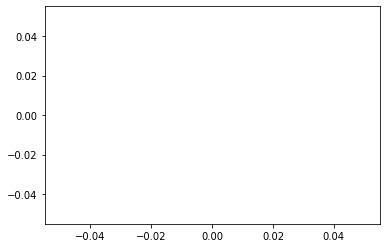

In [3]:
plt.plot()

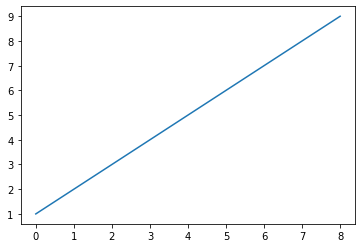

In [4]:
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9]);

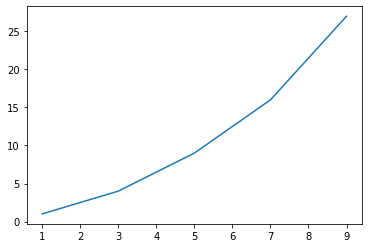

In [5]:
x = [1, 3, 5, 7, 9]
y = [1, 4, 9, 16, 27]
plt.plot(x, y)
plt.show()

#### Note: The pyplot API wish is based on MATLAN is usually less flexible than the object oriented API.
#### There are three methods to use the object oriented API

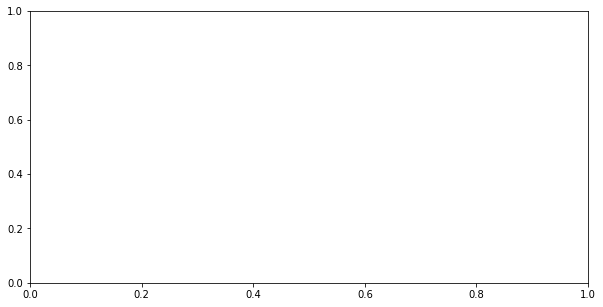

In [6]:
# First OO API method
fig = plt.figure(figsize=(10, 5)) # creates a figure
ax = fig.add_subplot() # add some axes
plt.show()

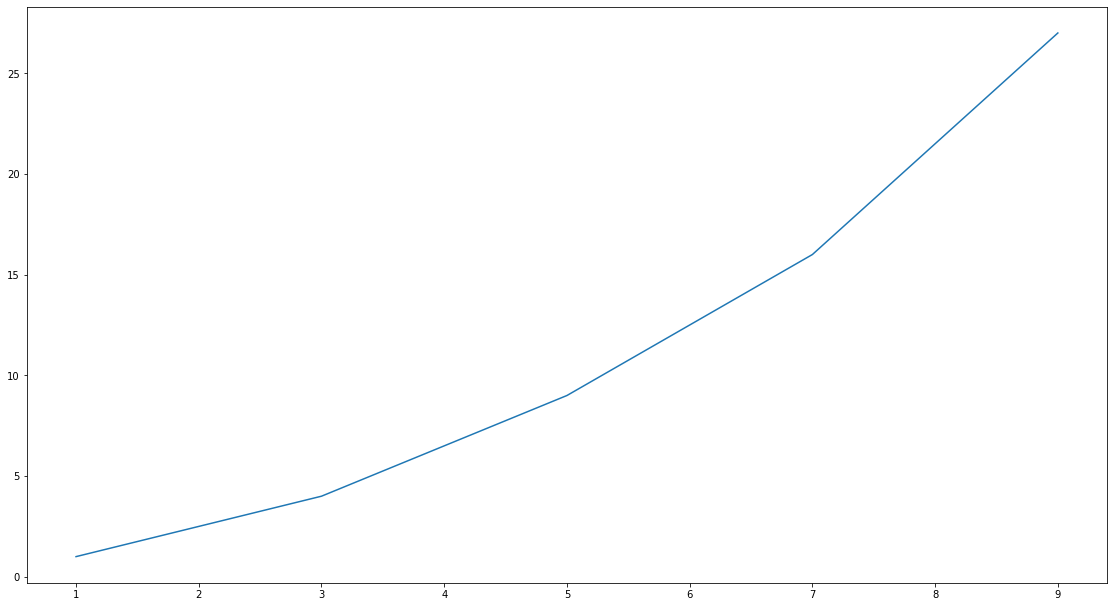

In [7]:
# Second OO API method
fig = plt.figure(figsize=(5, 2))
ax = fig.add_axes([1, 2, 3, 4])
ax.plot(x, y)
plt.show()

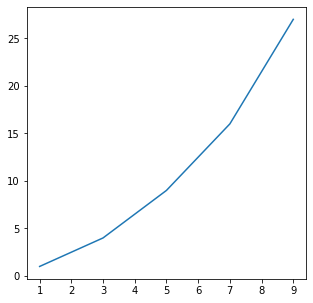

In [8]:
# Third OO API method (recommanded)
fig, ax = plt.subplots(figsize=(5, 5)) # creates a figure and a set of subplots
ax.plot(x, y);

In [9]:
type(fig), type(ax)

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

## The Anatomy of a Plot

<img src="media/matplotlib-anatomy-of-a-plot.png">

## The workflow of drawing a figure

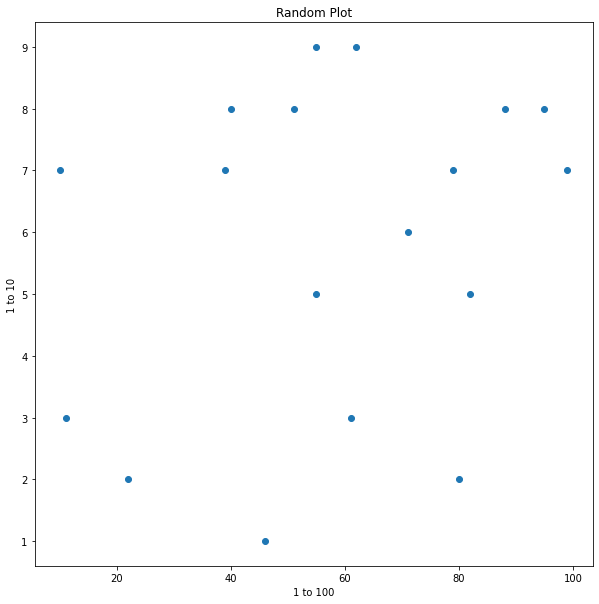

In [10]:
# 1. Importing the library and setting inline
%matplotlib inline
import matplotlib.pyplot as plt

# 2. Preparing the data
a = np.random.randint(1, 100, size=18)
b = np.random.randint(1, 10, size=18)

# 3. Setting up the figure and plot
fig, ax = plt.subplots(figsize=(10, 10))

# 4. Plotting the data
ax.scatter(a, b)

# 5. Customize the plot
ax.set(title="Random Plot", xlabel="1 to 100", ylabel="1 to 10")

# 6. Saving the plot
fig.savefig("pics/random_scatter.png")

## Making plots from numpy arrays

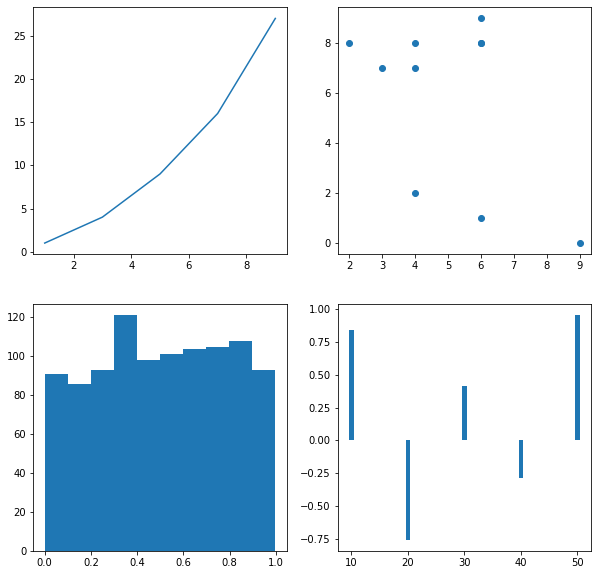

In [14]:
# fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0][0].plot(x, y)
ax[0][1].scatter(np.random.randint(10, size=10), np.random.randint(10, size=10))
ax[1][0].hist(np.random.random(1000))
ax[1][1].bar(np.array([10, 20, 30, 40, 50]), np.sin(y));

## Making plots from Python dictionary

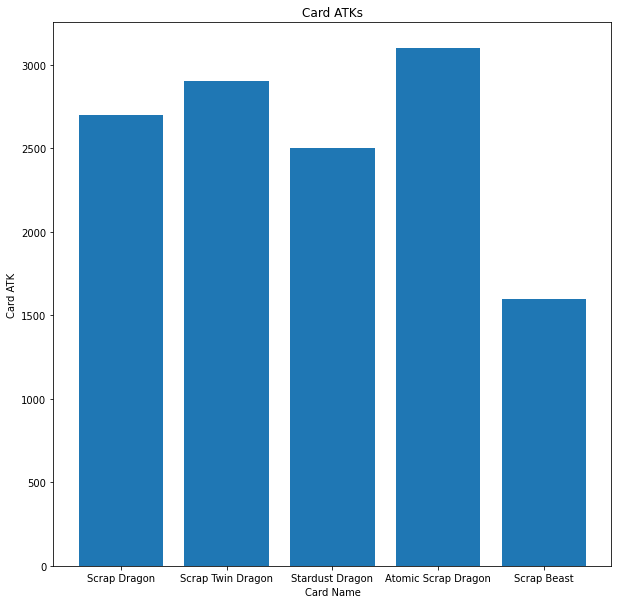

In [12]:
cards = {
    "Scrap Dragon": 2700,
    "Scrap Twin Dragon": 2900,
    "Stardust Dragon": 2500,
    "Atomic Scrap Dragon": 3100,
    "Scrap Beast": 1600
}

fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(cards.keys(), cards.values())
ax.set(title="Card ATKs", xlabel="Card Name", ylabel="Card ATK");

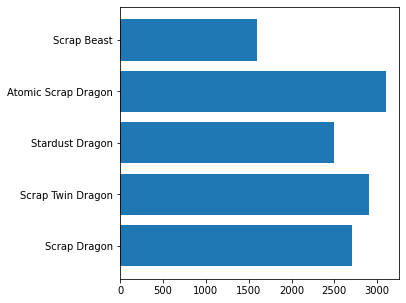

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.barh(list(cards.keys()), list(cards.values()));

## Making plots from pandas DataFrame and Series

In [15]:
data = pd.Series(np.random.randn(1000), index=pd.date_range("01/01/2015", periods=1000))

In [16]:
data_cumsum = data.cumsum()

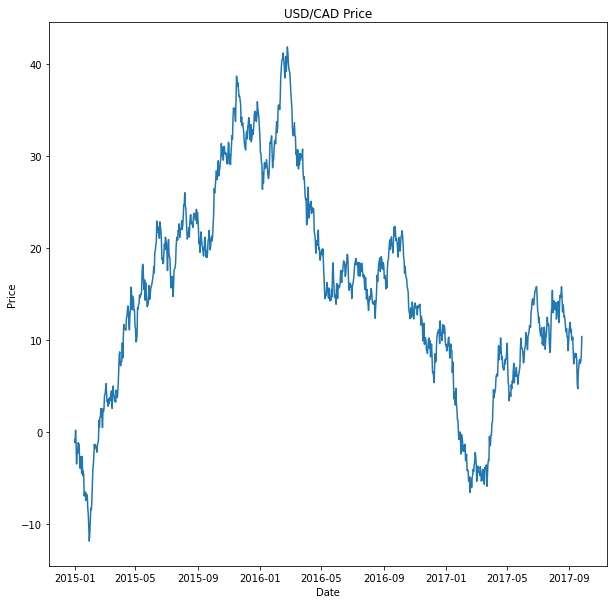

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(data_cumsum)
ax.set(title="USD/CAD Price", xlabel="Date", ylabel="Price");

In [20]:
car_sales = pd.read_csv("data/car_sales.csv")

In [21]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [23]:
car_sales["Price"] = car_sales["Price"].str.replace("[$,]", "", regex=True).astype(float)
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0


In [24]:
car_sales["Dates"] = pd.date_range("01/01/2015", periods=len(car_sales))
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price,Dates
0,Toyota,White,150043,4,4000.0,2015-01-01
1,Honda,Red,87899,4,5000.0,2015-01-02
2,Toyota,Blue,32549,3,7000.0,2015-01-03
3,BMW,Black,11179,5,22000.0,2015-01-04
4,Nissan,White,213095,4,3500.0,2015-01-05


In [25]:
car_sales.set_index("Dates", inplace=True)

In [26]:
car_sales["Total Sales"] = car_sales["Price"].cumsum()

In [27]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price,Total Sales
Dates,,,,,,
2015-01-01,Toyota,White,150043,4,4000.0,4000.0
2015-01-02,Honda,Red,87899,4,5000.0,9000.0
2015-01-03,Toyota,Blue,32549,3,7000.0,16000.0
2015-01-04,BMW,Black,11179,5,22000.0,38000.0
2015-01-05,Nissan,White,213095,4,3500.0,41500.0


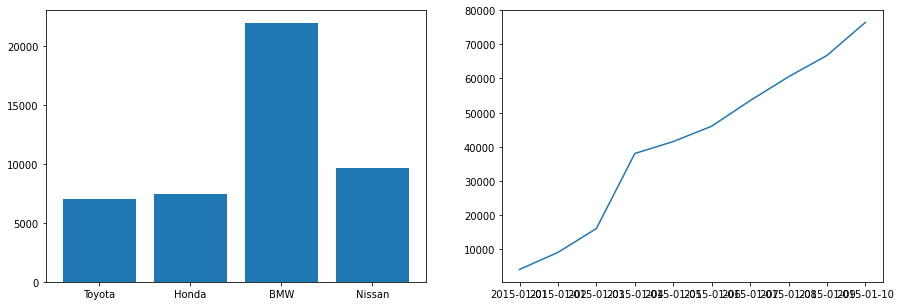

In [36]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax0.bar(car_sales["Make"], car_sales["Price"])
ax1.plot(car_sales["Total Sales"]);

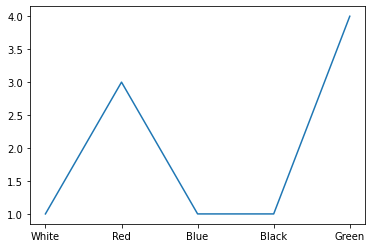

In [42]:
fig, ax = plt.subplots()
ax.plot(car_sales["Colour"].unique(), car_sales.groupby("Colour")["Colour"].count());

## Drawing Plots Using Pandas Built-In matplotlib

In [44]:
df = pd.DataFrame(np.random.random((10, 4)), columns=list("ABCD"))

In [45]:
df

,A,B,C,D
0,0.754517,0.908225,0.682071,0.489401
1,0.568957,0.571031,0.063818,0.727251
2,0.392792,0.274305,0.867141,0.725892
3,0.135292,0.944803,0.832460,0.268376
4,0.212695,0.678893,0.690789,0.327296
5,0.584714,0.059722,0.842407,0.930449
6,0.731091,0.954832,0.026388,0.719619
7,0.810203,0.653287,0.737972,0.859346
8,0.615432,0.833007,0.392925,0.926482
9,0.136198,0.444790,0.111033,0.780057


<AxesSubplot:>

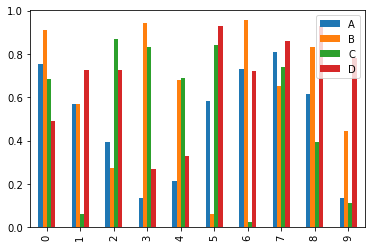

In [46]:
df.plot.bar()

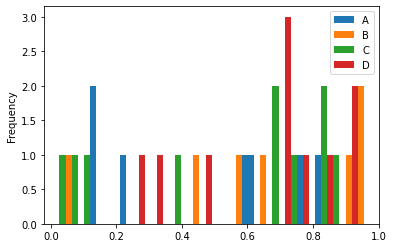

In [67]:
df.plot(kind="hist", bins=50); #bins controls the number of data distribution segments, default is 10

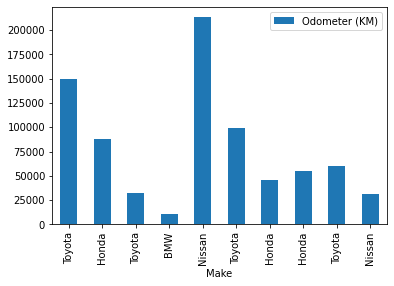

In [58]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

### Using filtered info from a DataFrame to display a plot

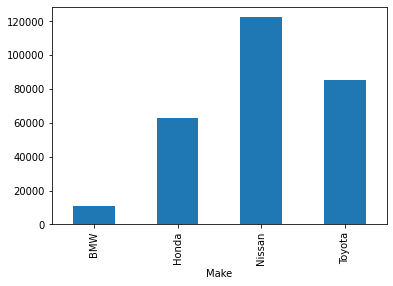

In [64]:
car_sales.groupby("Make")["Odometer (KM)"].mean().plot(kind="bar");